010-white.png
020-white.png
030-white.png
040-white.png
050-white.png
060-white.png
070-white.png
080-white.png
090-white.png
100-white.png
025-white.png
075-white.png
033-white.png
067-white.png


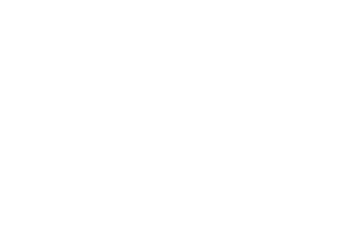

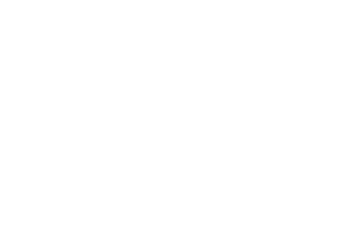

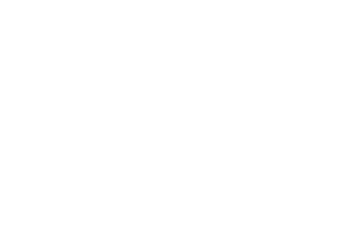

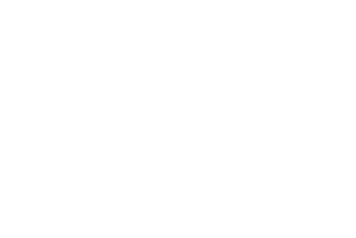

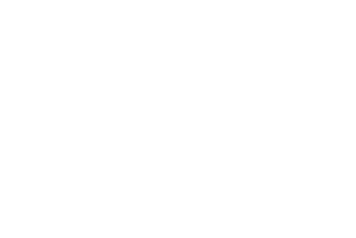

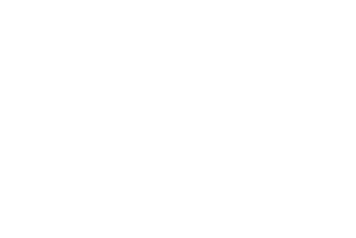

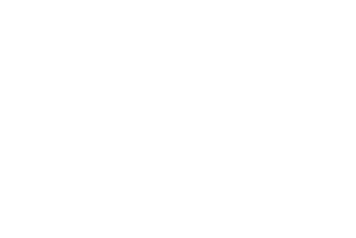

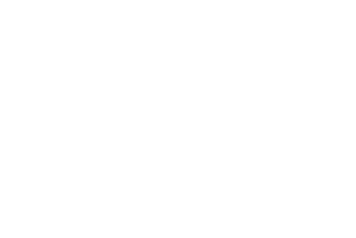

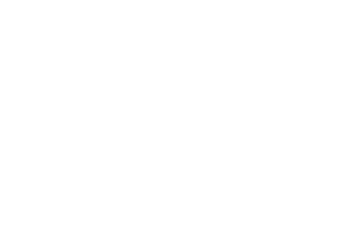

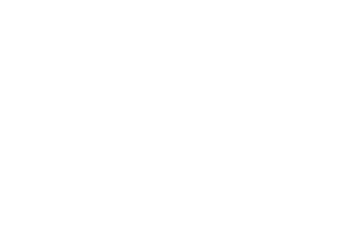

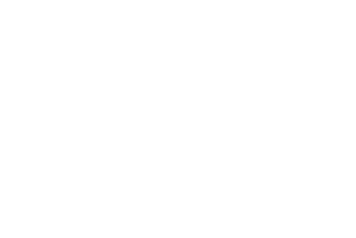

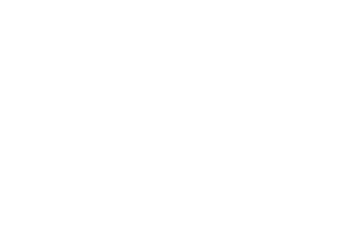

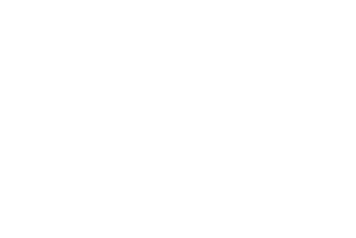

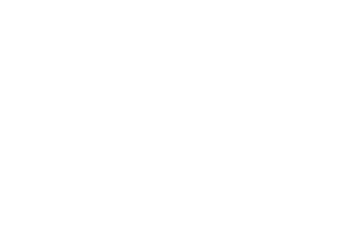

In [3]:
# https://en.wikipedia.org/wiki/Harvey_Balls

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import re
import numpy as np

def cutwedge(wedge, r=0.95):
    path = wedge.get_path()
    verts = path.vertices[:-3]
    codes = path.codes[:-3]
    new_verts = np.vstack((verts , verts[::-1]*r, verts[0,:]))
    new_codes =  np.concatenate((codes , codes[::-1], np.array([79])) )
    new_codes[len(codes)] = 2
    new_path = mpath.Path(new_verts, new_codes)
    new_patch = mpatches.PathPatch(new_path)
    new_patch.update_from(wedge)
    wedge.set_visible(False)
    wedge.axes.add_patch(new_patch)
    return new_patch

color = "white"
colors = [ color, color ]
sets = [x/10 for x in range(1,11)]
sets = sets + [ 1/4, 3/4, 1/3, 2/3 ]
for n in sets:
    fig, ax = plt.subplots()
    sizes = [ n, 1-n ]
    perc = re.sub("\.","","%0.2f" % n) + "-" + color + ".png"
    print(perc)
    wedges, text  = ax.pie(sizes, colors=colors, startangle=90, counterclock=False)
    #wedges[1].set_visible(False)
    cutwedge(wedges[1])
    plt.axis('equal')
    plt.savefig(perc, transparent=True)
